In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\raw\\Telco-Customer-Churn.csv")
display(df.head())
print(df.info())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [4]:
display(X.head(3))
display(y.head(3))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


0    0
1    0
2    1
Name: Churn, dtype: int64

In [5]:
# Splitting the dataset into train, validation and test sets

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size = 0.4,
    stratify=y,
    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size = 0.5,
    stratify=y_temp,
    random_state=42)

In [6]:
# check sizes
print("Sizes of datasets:\n")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

print("-" * 50)

# check target distribution
def target_distribution(y, name):
    print(name)
    print(y.value_counts(normalize=True))
    print()

print("Target distribution in each dataset:\n")
target_distribution(y_train, "Train: ")
target_distribution(y_val, "Validation: ")
target_distribution(y_test, "Test: ")
# target distribution is maintained across all sets => stratification worked well


Sizes of datasets:

Train: (4225, 19) (4225,)
Val:   (1409, 19) (1409,)
Test:  (1409, 19) (1409,)
--------------------------------------------------
Target distribution in each dataset:

Train: 
Churn
0    0.734675
1    0.265325
Name: proportion, dtype: float64

Validation: 
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Test: 
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64



In [7]:
# saving the datasets
X_train.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\X_train.csv", index=False)
y_train.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\y_train.csv", index=False)

X_val.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\X_val.csv", index=False)
y_val.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\y_val.csv", index=False)

X_test.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\X_test.csv", index=False)
y_test.to_csv("C:\\Users\\Affan\\Desktop\\Churn_Predictor\\data\\processed\\y_test.csv", index=False)

In [8]:
# Defining the baseline classifier model
baseline_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Training
baseline_clf.fit(X_train, y_train)

# Validate
y_val_pred = baseline_clf.predict(X_val)

# Evaluate
baseline_accuracy = accuracy_score(y_val, y_val_pred)

print("Baseline validation accuracy:", round(baseline_accuracy, 4))

Baseline validation accuracy: 0.7346


In [9]:
# Defining the first most simple model

# Seperating numerical and categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing

preprocessor = ColumnTransformer(
    transformers = [
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", 
         Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), 
        cat_cols)
    ]
)

# model pipeline
model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

# train
model.fit(X_train, y_train)

# validate
y_val_pred = model.predict(X_val)

Confusion Matrix for Validation Set:


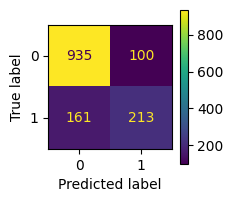

In [10]:
# evaluate

# defining the confusion matrix
print("Confusion Matrix for Validation Set:")
fig, ax = plt.subplots(figsize=(2, 2))

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

**Confusion Matrix Interpretation:**  
The model correctly identifies most non-churn customers, but misses a significant number of actual churners (false negatives > false positives), indicating a conservative prediction behavior. For a churn problem, this suggests recall may need to be improved to catch more potential churners, even at the cost of additional false positives.


In [11]:
# Calculate evaluation metrics

logReg_accuracy = accuracy_score(y_val, y_val_pred)
logReg_precision = precision_score(y_val, y_val_pred)
logReg_recall = recall_score(y_val, y_val_pred)
logReg_f1 = f1_score(y_val, y_val_pred)

print("Logistic Regression Validation Metrics:")
print("Accuracy: ", round(logReg_accuracy, 4))
print("Precision:", round(logReg_precision, 4))
print("Recall:   ", round(logReg_recall, 4))
print("F1 Score: ", round(logReg_f1, 4))

Logistic Regression Validation Metrics:
Accuracy:  0.8148
Precision: 0.6805
Recall:    0.5695
F1 Score:  0.6201


**Accuracy (0.81)** : Overall performance is good, but inflated by many non-churn customers.

**Precision (0.68)** : When the model predicts churn, it’s right ~68% of the time. False alarms exist but aren’t extreme.

**Recall (0.57)** : The model catches only ~57% of actual churners. 43% churners are missed → this is the main weakness.

**F1 (0.62)** : Balanced summary showing recall is pulling performance down.

***Recall < Precision => FN problem (Since Low recall = many FN)***

In [12]:
# create validation results dataframe
val_results = X_val.copy()
val_results["y_true"] = y_val.values
val_results["y_pred"] = y_val_pred

# false negatives: actual churn but predicted no churn
false_negatives = val_results[
    (val_results["y_true"] == 1) & (val_results["y_pred"] == 0)
]

# true positives: actual churn and predicted churn
true_positives = val_results[
    (val_results["y_true"] == 1) & (val_results["y_pred"] == 1)
]

print("False Negatives:", false_negatives.shape[0])
print("True Positives:", true_positives.shape[0])

False Negatives: 161
True Positives: 213


In [23]:
# analyze tenure feature in false negatives and true positives

print("TENURE\n")
print("False Negatives:")
print(false_negatives["tenure"].describe())
print("\nTrue Positives:")
print(true_positives["tenure"].describe())

TENURE

False Negatives:
count    161.000000
mean      24.037267
std       21.916001
min        1.000000
25%        3.000000
50%       16.000000
75%       42.000000
max       72.000000
Name: tenure, dtype: float64

True Positives:
count    213.000000
mean      10.845070
std       11.223688
min        1.000000
25%        2.000000
50%        7.000000
75%       17.000000
max       55.000000
Name: tenure, dtype: float64


In [22]:
# analyze MonthlyCharges feature in false negatives and true positives

print("MONTHLY CHARGES\n")
print("False Negatives:")
print(false_negatives["MonthlyCharges"].describe())
print("\nTrue Positives:")
print(true_positives["MonthlyCharges"].describe())


MONTHLY CHARGES

False Negatives:
count    161.000000
mean      62.228571
std       28.525583
min       18.950000
25%       40.650000
50%       56.700000
75%       86.150000
max      111.950000
Name: MonthlyCharges, dtype: float64

True Positives:
count    213.000000
mean      79.926291
std       16.526043
min       24.450000
25%       73.900000
50%       80.500000
75%       90.600000
max      113.200000
Name: MonthlyCharges, dtype: float64


In [15]:
# analyze Contract feature in false negatives and true positives

print("CONTRACT DISTRIBUTION")
print("\nFalse Negatives:")
print(false_negatives["Contract"].value_counts(normalize=True))

print("\nTrue Positives:")
print(true_positives["Contract"].value_counts(normalize=True))

CONTRACT DISTRIBUTION

False Negatives:
Contract
Month-to-month    0.782609
One year          0.192547
Two year          0.024845
Name: proportion, dtype: float64

True Positives:
Contract
Month-to-month    1.0
Name: proportion, dtype: float64


**Error Analysis Observations (False Negatives vs True Positives):**  
After analysing the above numbers, I noticed the model tends to miss churners who have longer tenure and lower monthly charges, suggesting that customers with seemingly better deals are harder for the model to flag. In contrast, customers correctly identified as churners are almost exclusively on month-to-month contracts, indicating that contract flexibility is a strong and easily learned churn signal. This suggests the model relies heavily on short-term, high-cost patterns and struggles with more subtle churn behavior among long-term customers.


In [16]:
# Threshold Adjustment for the Logistic Regression model

# get churn probabilities instead of class labels
y_val_proba = model.predict_proba(X_val)[:, 1]

# lower decision threshold. 
# This will increase recall and reduce false negatives making the model less conservative.
threshold = 0.35
y_val_pred_thresh = (y_val_proba >= threshold).astype(int)

In [17]:
# New metrics after threshold adjustment
print(f"Metrics after Threshold Adjustment (Threshold = {threshold}):\n")
print("Accuracy: ", round(accuracy_score(y_val, y_val_pred_thresh), 4))
print("Precision:", round(precision_score(y_val, y_val_pred_thresh), 4))
print("Recall:   ", round(recall_score(y_val, y_val_pred_thresh), 4))
print("F1 Score: ", round(f1_score(y_val, y_val_pred_thresh), 4))

Metrics after Threshold Adjustment (Threshold = 0.35):

Accuracy:  0.7828
Precision: 0.5717
Recall:    0.7246
F1 Score:  0.6392


We had a significant gain in recall and a fair trade off for the precision. In this case such a high jump in recall justifies the drop in precision. I will lock 0.35 as the threshold value and evaluate on the test set now.

In [18]:
# Evaluate on test set with adjusted threshold

# get test probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]

# apply locked threshold
threshold = 0.35
y_test_pred = (y_test_proba >= threshold).astype(int)

In [19]:
# metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Logistic Regression Test Metrics (Threshold = 0.35):")
print("Accuracy: ", round(test_accuracy, 4))
print("Precision:", round(test_precision, 4))
print("Recall:   ", round(test_recall, 4))
print("F1 Score: ", round(test_f1, 4))

Logistic Regression Test Metrics (Threshold = 0.35):
Accuracy:  0.7693
Precision: 0.5511
Recall:    0.7059
F1 Score:  0.619


Now I will check if a non linear model improves results considerably or not

In [20]:
# reusing the same preprocessing as before
rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# train
rf_model.fit(X_train, y_train)

# validate
y_val_pred_rf = rf_model.predict(X_val)

In [21]:
# metrics
print("Random Forest Validation Metrics:")
print("Accuracy: ", round(accuracy_score(y_val, y_val_pred_rf), 4))
print("Precision:", round(precision_score(y_val, y_val_pred_rf), 4))
print("Recall:   ", round(recall_score(y_val, y_val_pred_rf), 4))
print("F1 Score: ", round(f1_score(y_val, y_val_pred_rf), 4))

Random Forest Validation Metrics:
Accuracy:  0.7977
Precision: 0.6732
Recall:    0.4626
F1 Score:  0.5483


RF has given worse results proving that a non linear model is not what the data needs